# 1. Business Understanding

Many online mail order companies have a high return rate
(of up to 50%), with 97% of all returned products being able to be restocked
and can be sold. In order to resell the goods
goods, they must be identified, labeled, and restocked accordingly.
again.
Assuming that in 2020 185.5 million orders (Statista, 2021) with
6 items each (acceptance) would be received, then a return rate of 50% would mean that
of 50%, 556.5 million items would have to be re-identified and re-categorized.
To support this process and to facilitate identification of the
returned garments, image recognition software is to be developed that will
the associated categories of the individual garments on the basis of images.
of the individual garments on the basis of images.

# 2. Read Data

## 2.1. Import of Relavant Modules 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Layer
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
# Should be 2.5.0
tf.__version__

'2.6.0'

## 2.2 Read Data


The training- and test-data is already labeled and split up into two datasets

### It is required to download and extract the dataset from:

https://reutlingenuniversityde-my.sharepoint.com/:f:/g/personal/elias_waschin-scholvin_student_reutlingen-university_de/EnMJgHGtwG5Egw42bRMioMABm5MIJ3ydPJJI36qmse7VpA?e=bRYeWg

Please extract to a /data folder

In [4]:
csv_file_train = "https://storage.googleapis.com/ml-service-repository-datastorage/Classification_of_clothing_through_images_fashion-mnist_train.csv"
csv_file_test = "https://storage.googleapis.com/ml-service-repository-datastorage/Classification_of_clothing_through_images_fashion-mnist_test.csv"
df_train = pd.read_csv(csv_file_train) 
df_test = pd.read_csv(csv_file_test)

FileNotFoundError: [Errno 2] No such file or directory: 'data/fashion-mnist_train.csv'

## 2.3. Data Analysis

In [16]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Describe the dataframe, not really helpful in this case, but is shows that the data is not corrupted by evaluating:
- Label must be between 0 and 9
- Pixel values must be between 0 and 255 (non-negative)
- Count must be 60000 (train) 10000 (test)
- Maximum number of pixels must be 784 for all rows

In [17]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [123]:
df_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


Both test data and train data seems to be valid and uncorrupted

Define human readable names for the 10 categories

In [125]:
class_names = ['Top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

Split the dataset an check the distribution of each class (split could be also done later)

In [126]:
df_train, df_val = train_test_split(df_train, test_size=0.1, random_state=365)
print(f"{len(df_train)} train examples")
print(f"{len(df_val)} validation examples")
print(f"{len(df_test)} test examples")

48600 train examples
5400 validation examples
10000 test examples


Show the distribution for each set

In [127]:
def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = class_names[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

print("\nTRAIN DISTRIBUTION\n")
get_classes_distribution(df_train)
print("\nVALIDATION DISTRIBUTION\n")
get_classes_distribution(df_val)
print("\nTEST DISTRIBUTION\n")
get_classes_distribution(df_test)


TRAIN DISTRIBUTION

Sandal              :   4904 or 10.090534979423868%
Sneaker             :   4897 or 10.076131687242798%
Dress               :   4888 or 10.05761316872428%
Pullover            :   4872 or 10.024691358024691%
Coat                :   4862 or 10.004115226337449%
Top                 :   4848 or 9.975308641975309%
Trouser             :   4845 or 9.969135802469136%
Shirt               :   4842 or 9.962962962962962%
Ankle boot          :   4840 or 9.958847736625515%
Bag                 :   4802 or 9.880658436213992%

VALIDATION DISTRIBUTION

Ankle boot          :   564 or 10.444444444444445%
Bag                 :   560 or 10.37037037037037%
Coat                :   559 or 10.351851851851853%
Shirt               :   555 or 10.277777777777777%
Top                 :   548 or 10.148148148148147%
Trouser             :   539 or 9.981481481481481%
Pullover            :   535 or 9.907407407407408%
Sandal              :   525 or 9.722222222222223%
Dress               :   517 or 9.57

This is already helpful, we can see that it is quite evenly split.
Print the data as a pie chart, to make it even nicer.

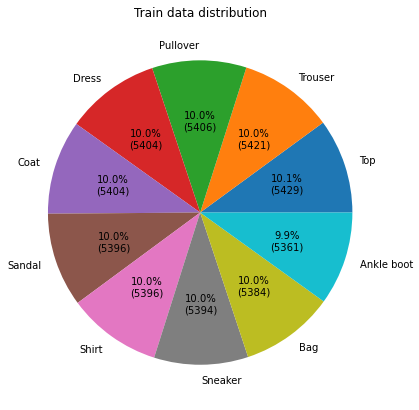

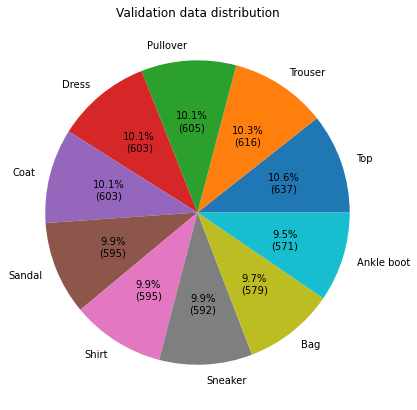

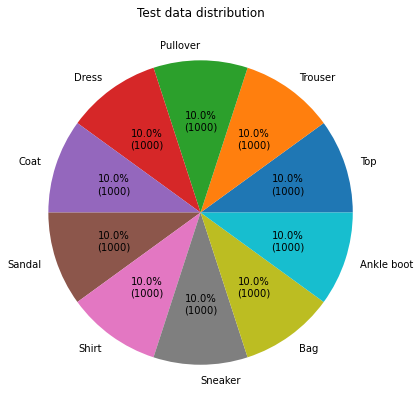

In [21]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

def plot_pie(title, data):
    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.pie(data, autopct = lambda pct: func(pct, data), labels = class_names)
    ax.set_title(title)
  
    # show plot
    plt.show()

plot_pie("Train data distribution", df_train["label"].value_counts())
plot_pie("Validation data distribution", df_val["label"].value_counts())
plot_pie("Test data distribution", df_test["label"].value_counts())

Print a single image

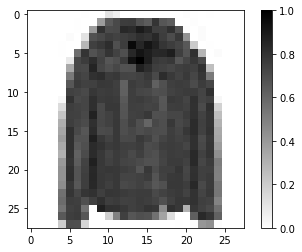

In [22]:
# Make copies of the data to allow easy exploration
df_train_exp_copy = df_train.copy() 
y_train_exp = df_train_exp_copy.pop('label').to_numpy()
x_train_exp = df_train_exp_copy.to_numpy()


# Take a single image, and remove the color dimension by reshaping
image = x_train_exp[0].reshape((28,28)) / 255.0

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Print one image from each category to see how they look like and how they differ

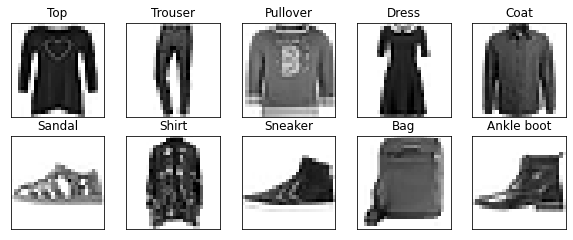

In [24]:
plt.figure(figsize=(10,10))
i = 0
for index in range(len(x_train_exp)):
    label = y_train_exp[index]
    image = x_train_exp[index] / 255.0
    if label == i:
        image = image.reshape((28,28))
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image, cmap=plt.cm.binary)
        plt.title(class_names[label])
        i += 1
    if i == 10:
        break
plt.show()

# 3. Data preperation

## 3.1. Test and Train Data

In [25]:
df_train_copy = df_train.copy() 
y_train = df_train_copy.pop('label').to_numpy()
x_train = df_train_copy.to_numpy()
df_val_copy = df_val.copy() 
y_val = df_val_copy.pop('label').to_numpy()
x_val = df_val_copy.to_numpy()
df_test_copy = df_test.copy() 
y_test = df_test_copy.pop('label').to_numpy()
x_test = df_test_copy.to_numpy()

## 3.2. Feature Scaling

In [26]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

Convert the image shape from 784 to 28x28 (only if load as CSV with 784 columns)

In [27]:
IMG_ROWS = 28
IMG_COLS = 28
IMAGE_SHAPE = (IMG_ROWS, IMG_COLS, 1) 
x_train = x_train.reshape(x_train.shape[0], *IMAGE_SHAPE)
x_val = x_val.reshape(x_val.shape[0], *IMAGE_SHAPE)
x_test = x_test.reshape(x_test.shape[0], *IMAGE_SHAPE)

## 3.3. Convert Labels

In [28]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

Check the data shapes to get ensure that the data is in the correct format

In [128]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)


(54000, 28, 28, 1)
(54000, 10)
(6000, 28, 28, 1)
(6000, 10)
(10000, 28, 28, 1)
(10000, 10)


# 4. Modelling and Evaluation

Define how the model will look like. Below some descriptions for different Layer types.
The first trial of this model was just a DNN with simple dense layers, but the results can be improved by using a CNN.
As a start architecture the LeNet-5 implementation was chosen and then altered.
The hyperparameters could also be optimized with a Keras Optimizer which tries out several defined combinations.
The current parameters got chosen by exploration.

- Dense: receives all inputs from previous layer, creates dot product 
- Dropout layer: removes noise for overfitting, drops at specific rate
- Reshape layer: changes the shape of the input, not used
- Permute layer: alter shape of the input, not used
- ReapeatVector layer: repeats the input for fixed number of times, not used
- Flatten Layer: flattens the matrix
- MaxPooling2D Layer: reduces number of input
- Conv2D Layer: convolves an input

In [196]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.40))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

Compile the model

In [197]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss= tf.keras.losses.categorical_crossentropy, 
    metrics=['accuracy']
)

Train/Fit the model

In [198]:
# Determine the maximum number of epochs
NUM_EPOCHS = 10
BATCH_SIZE = 64

# Fit the model, 
# specify the training data
# the total number of epochs
# and the validation data we just created 
history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(x_val, y_val), 
    validation_steps=10,
    verbose =2
)

Epoch 1/10
844/844 - 45s - loss: 0.4327 - accuracy: 0.8459 - val_loss: 0.2944 - val_accuracy: 0.9109
Epoch 2/10
844/844 - 45s - loss: 0.2855 - accuracy: 0.8970 - val_loss: 0.2446 - val_accuracy: 0.9094
Epoch 3/10
844/844 - 45s - loss: 0.2387 - accuracy: 0.9125 - val_loss: 0.2268 - val_accuracy: 0.9125
Epoch 4/10
844/844 - 45s - loss: 0.2071 - accuracy: 0.9248 - val_loss: 0.2362 - val_accuracy: 0.9062
Epoch 5/10
844/844 - 46s - loss: 0.1823 - accuracy: 0.9328 - val_loss: 0.2032 - val_accuracy: 0.9328
Epoch 6/10
844/844 - 45s - loss: 0.1606 - accuracy: 0.9400 - val_loss: 0.2207 - val_accuracy: 0.9250
Epoch 7/10
844/844 - 46s - loss: 0.1426 - accuracy: 0.9470 - val_loss: 0.2414 - val_accuracy: 0.9203
Epoch 8/10
844/844 - 45s - loss: 0.1240 - accuracy: 0.9540 - val_loss: 0.2205 - val_accuracy: 0.9312
Epoch 9/10
844/844 - 48s - loss: 0.1099 - accuracy: 0.9589 - val_loss: 0.2306 - val_accuracy: 0.9344
Epoch 10/10
844/844 - 47s - loss: 0.0979 - accuracy: 0.9633 - val_loss: 0.2215 - val_accura

We want do know how especially the loss changes over time

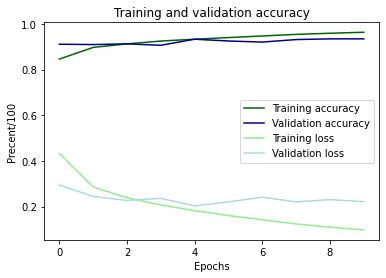

<Figure size 432x288 with 0 Axes>

In [225]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "darkgreen", label="Training accuracy")
plt.plot(epochs, val_acc, "darkblue", label="Validation accuracy")
plt.plot(epochs, loss, "lightgreen", label="Training loss")
plt.plot(epochs, val_loss, "lightblue", label="Validation loss")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Precent/100")
plt.legend(loc=0)
plt.figure()


plt.show()

We can see that the model is performing quite well, but after the second epoch it starts to overfit. To prevent that we could try with different train-validation splits, add more dropout or restructure parts of the model.

Evaluate the test-data

In [200]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

In [202]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.21. Test accuracy: 93.24%


The model performs quite well with an accuracy of > 90% on the test-data. The loss is acceptable.

Show results by class

In [205]:
predicted_classes = (model.predict(x_test) > 0.5).astype("int32")

In [206]:
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

         Top       0.90      0.88      0.89      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.91      0.88      0.89      1000
       Dress       0.93      0.96      0.94      1000
        Coat       0.89      0.92      0.90      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.84      0.77      0.80      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

   micro avg       0.94      0.93      0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000
 samples avg       0.93      0.93      0.93     10000



/usr/local/anaconda3/envs/tensorflow_37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can observe that the model struggles especially with tops, shirts and pullovers. This is probably due to the fact that they look quite similar. To prevent that it could be helpful to increase image size to get more details, add more color channels or try to identify the texture of the article with some specified layers.

# 5. Deployment
Deploy the model as docker container to make it available as a http service

In [187]:
model.save('fashion_model/1', save_format='tf')

INFO:tensorflow:Assets written to: fashion_model/1/assets


Show the data

In [189]:
!ls -ll fashion_model/1

total 320
drwxr-xr-x  2 elwa  staff      64 Jul 11 17:23 assets
-rw-r--r--  1 elwa  staff   14391 Jul 11 17:23 keras_metadata.pb
-rw-r--r--  1 elwa  staff  146943 Jul 11 17:23 saved_model.pb
drwxr-xr-x  4 elwa  staff     128 Jul 11 17:23 variables


Zip the model

In [190]:
!zip -r fashion_model_v1.zip fashion_model

  adding: fashion_model/ (stored 0%)
  adding: fashion_model/1/ (stored 0%)
  adding: fashion_model/1/keras_metadata.pb (deflated 90%)
  adding: fashion_model/1/variables/ (stored 0%)
  adding: fashion_model/1/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: fashion_model/1/variables/variables.index (deflated 64%)
  adding: fashion_model/1/saved_model.pb (deflated 88%)
  adding: fashion_model/1/assets/ (stored 0%)


Start with the tensorflow/serving docker container if docker is installed
```
docker pull tensorflow/serving
docker run -t --rm -p 8501:8501 \
    -v "<path_to_model>/fashion_model:/models/fashion_model" \
    -e MODEL_NAME=fashion_model \
    tensorflow/serving

```

The model should no be available for post requests at http://localhost:8501/v1/models/fashion_model:predict

# Extension 1: Using RGB-Images
Import general RGB images downloaded from the internet and try to predict their category with the model. 
For this case some random images where downloaded from google, converted to a quadratic shape.
For each category three images are in the "custom set".

In [207]:
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import os, os.path

Load all images by filename (sorted by name)

In [208]:
basewidth = 72
path = "data/colored"
images= {}

valid_images = [".jpg",".jpeg", ".gif",".png",".tga"]
for fullname in sorted(os.listdir(path)):
    ext = os.path.splitext(fullname)[1]
    if ext.lower() not in valid_images:
        continue
    img = Image.open(os.path.join(path,fullname))
    images[fullname] = img 

Print all the example images

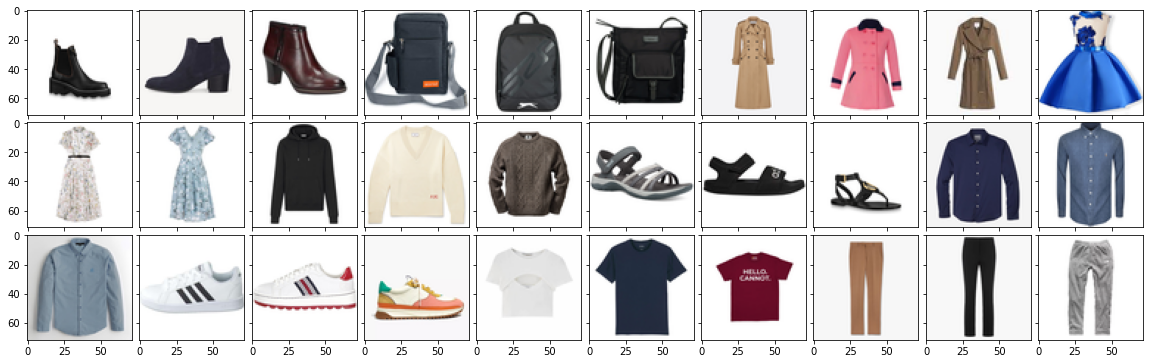

In [209]:
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(3, 10),
                 axes_pad=0.1,
                 )

for ax, (name, img) in zip(grid, images.items()):
    basewidth = 72
    display_image = img.resize((basewidth,basewidth), Image.ANTIALIAS)
    ax.imshow(display_image)

plt.show()

This is a really important function as it does the actually preprocessing of the image into a format which is "understandable" by the model. It probably would make sense to split this function up.
The commented code below shows how this function could be implemented as custom layer to include it into a model. We subclass a layer for this, but probably we could alternatively just use a "Lambda"-Layer (or subclass it)

In [212]:
def convert_image(image, output_size):
    img = image.convert('L') # Convert to grayscale
    img = img.resize(output_size, Image.ANTIALIAS) # Reduce the size to 28x28 no matter how big the image
    img = np.asarray(img) # Convert to array
    img = 1- img # Invert colors
    img = img.reshape((28,28, 1))/ 255.0 # Reshape and scale colors to 0-1
    return img

In [213]:
# Note: it would also be possible to create a custom layer for preprocessing, this is currently not used though

# basewidth = 28

# class ConvertRGBImageLayer(Layer):
#     def __init__(self, output_size):
#         super(ConvertRGBImageLayer, self).__init__()
#         self.output_size = output_size

#     def call(self, inputs):
#         return lambda x: convert_image(x, self.output_size)

# preprocessing_layer = ConvertRGBImageLayer((28, 28))

Show the converted images

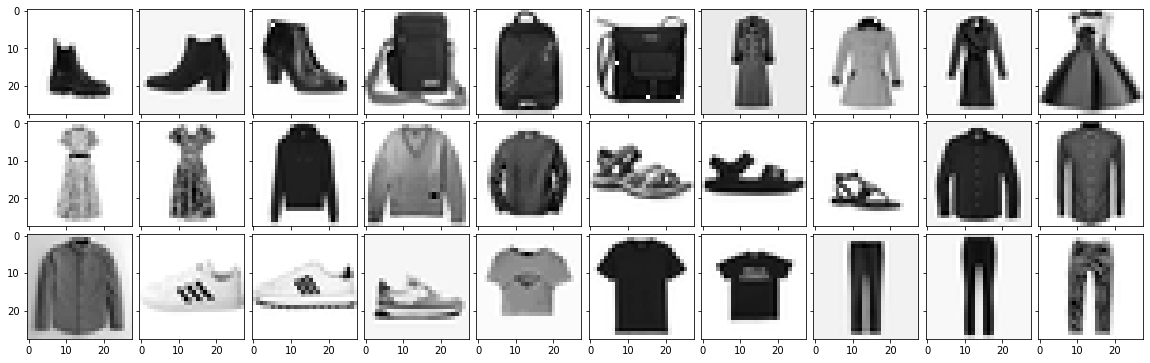

In [214]:
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(3, 10),
                 axes_pad=0.1,
                 )

for ax, (name, img) in zip(grid, images.items()):
    basewidth = 28
    display_image = convert_image(img, (basewidth, basewidth))
    ax.imshow(display_image, cmap=plt.cm.binary)

plt.show()

In [215]:
scaled_images = []

Predict each image, show the expected result by lable and display the image

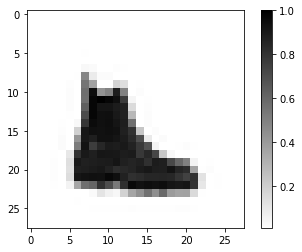

Predicted Bag, Expected: ankle_boot_0


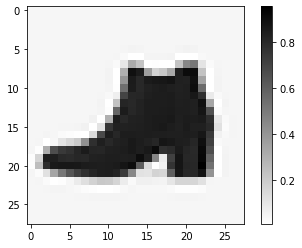

Predicted Ankle boot, Expected: ankle_boot_1


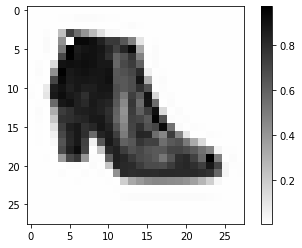

Predicted Bag, Expected: ankle_boot_2


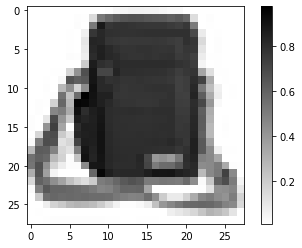

Predicted Bag, Expected: bag_0


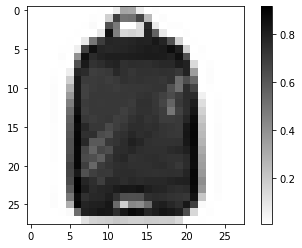

Predicted Bag, Expected: bag_1


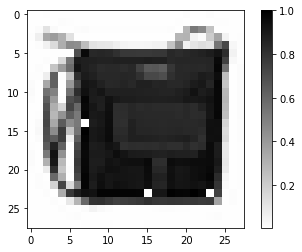

Predicted Bag, Expected: bag_2


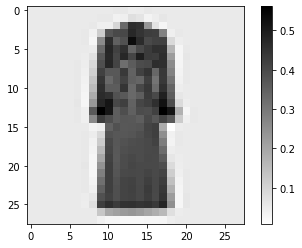

Predicted Top, Expected: coat_0


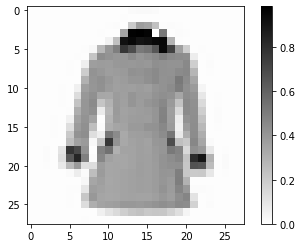

Predicted Coat, Expected: coat_1


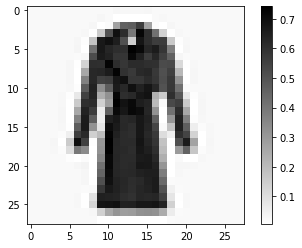

Predicted Coat, Expected: coat_2


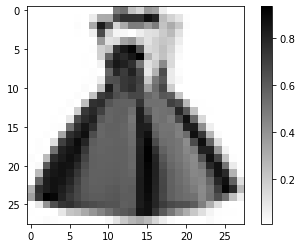

Predicted Dress, Expected: dress_0


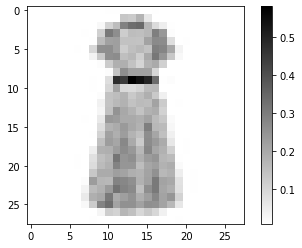

Predicted Dress, Expected: dress_1


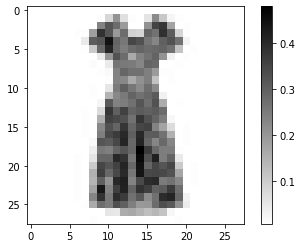

Predicted Dress, Expected: dress_2


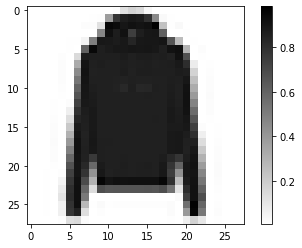

Predicted Coat, Expected: pullover_0


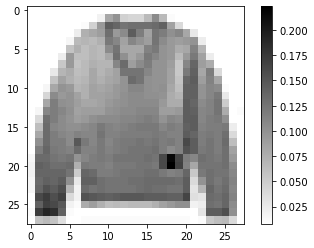

Predicted Pullover, Expected: pullover_1


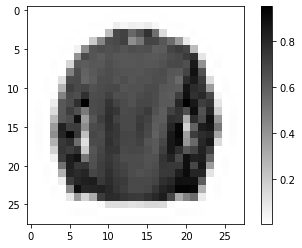

Predicted Coat, Expected: pullover_2


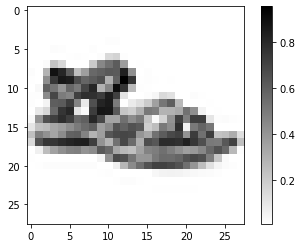

Predicted Bag, Expected: sandal_0


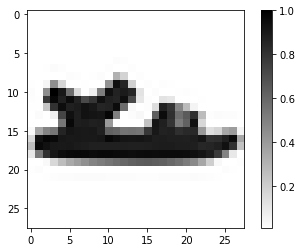

Predicted Sandal, Expected: sandal_1


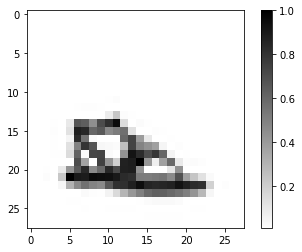

Predicted Sandal, Expected: sandal_2


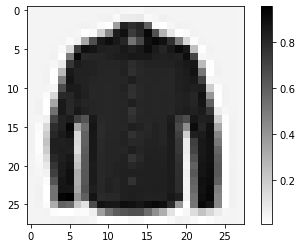

Predicted Coat, Expected: shirt_0


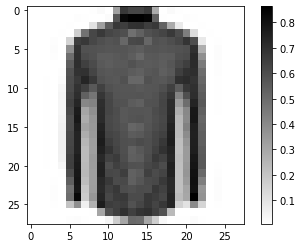

Predicted Shirt, Expected: shirt_1


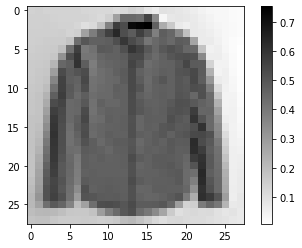

Predicted Coat, Expected: shirt_2


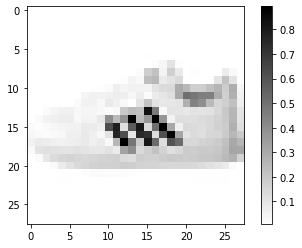

Predicted Sneaker, Expected: sneaker_0


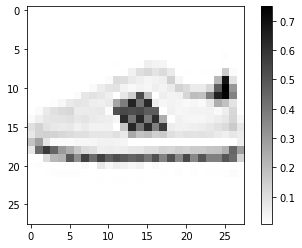

Predicted Sneaker, Expected: sneaker_1


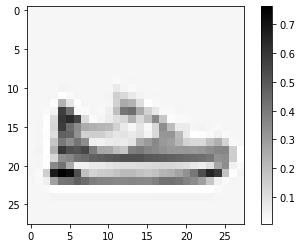

Predicted Bag, Expected: sneaker_2


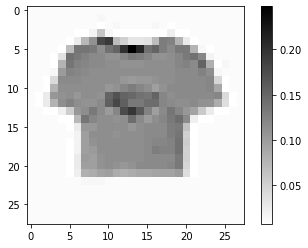

Predicted Top, Expected: top_0


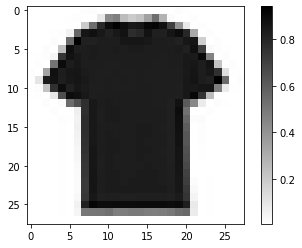

Predicted Top, Expected: top_1


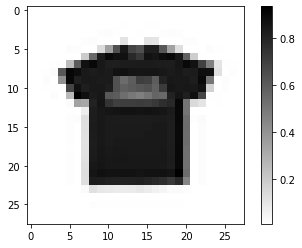

Predicted Top, Expected: top_2


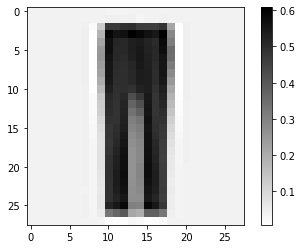

Predicted Trouser, Expected: trouser_0


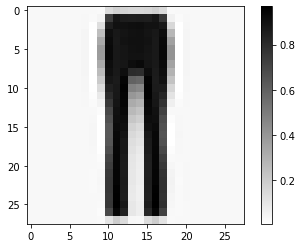

Predicted Trouser, Expected: trouser_1


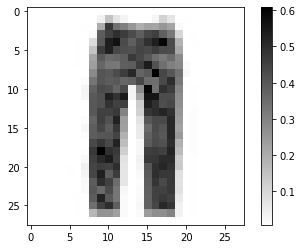

Predicted Trouser, Expected: trouser_2


In [216]:
basewidth = 28
for name, img in images.items():
    test = convert_image(img, (basewidth, basewidth))
    plt.imshow(test, cmap=plt.cm.binary)
    plt.colorbar()
    plt.show()
    # We predict every single image one after another (there might be more efficient methods) 
    test = test.reshape(1, 28, 28, 1)
    predictions = (model.predict(test) > 0.5).astype("int32")
    for prediction in predictions:
        result, = np.where(prediction == np.amax(prediction))
        print(f"Predicted {class_names[result[0]]}, Expected: {name.split('.')[0]}")

Create numpy arrays from the loaded data (this could be also done earlier to simplify things)

In [217]:
# Note: Could be transformed also earlier
colored_y = []
colored_x = []
for name, image in images.items():
    for index in range(len(class_names)):
        if class_names[index].lower().replace(" ", "_") in name.lower():
            colored_y.append(index)
            colored_x.append(convert_image(image, (28, 28)))
            continue
        continue

In [218]:
# Transform again
colored_y = np.array(to_categorical(colored_y, 10)).reshape(30, 10)
colored_x = np.array(colored_x).reshape(30, 28, 28, 1)

Evaluate our custom-data set

In [219]:
test_loss, test_accuracy = model.evaluate(colored_x, colored_y, verbose=0)

In [220]:
# Apply some nice formatting
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 1.99. Test accuracy: 73.33%


In [221]:
predicted_classes = (model.predict(colored_x) > 0.5).astype("int32")

In [222]:
print(classification_report(colored_y, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

         Top       1.00      1.00      1.00         3
     Trouser       1.00      1.00      1.00         3
    Pullover       1.00      0.33      0.50         3
       Dress       1.00      1.00      1.00         3
        Coat       0.33      0.67      0.44         3
      Sandal       1.00      0.67      0.80         3
       Shirt       1.00      0.33      0.50         3
     Sneaker       1.00      0.67      0.80         3
         Bag       0.43      1.00      0.60         3
  Ankle boot       1.00      0.33      0.50         3

   micro avg       0.72      0.70      0.71        30
   macro avg       0.88      0.70      0.71        30
weighted avg       0.88      0.70      0.71        30
 samples avg       0.70      0.70      0.70        30



/usr/local/anaconda3/envs/tensorflow_37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model is performing way worse on the custom-data-set than on the actual test-data. 
This has several reasons and shows how difficult it is to work with "real"-data. Although the chosen images are already kind of preprocessed by choosing only image where the article is displayed with a white background, the image is quadratic and the product is shown "upfront", there are still a lot of things which make it hard for the model to predict the correct category. Some issues could be:
- The image should be mirrored (e.g. left shoe/right shoe in the image)
- The background should be completely white (some images have a shadow)
- The padding around the article is not the same on all images
- Rotations can confuse the model (e.g. ankle_boot_2)

It is clear that this data is not representative in any way.

# Extension 2
Try to visualize the layer output of specific layers.

In [119]:
from tensorflow.keras import models

Get a sample image from the training-data

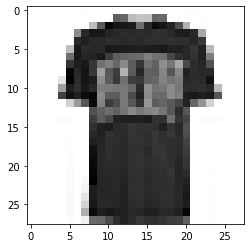

In [182]:
test_im = x_train[789]
plt.imshow(test_im.reshape(28,28), cmap=plt.cm.binary, interpolation='none')
plt.show()

We iterate over the output of the Layers and display the results for this specific image after the first and the second Convolutional-Layer 

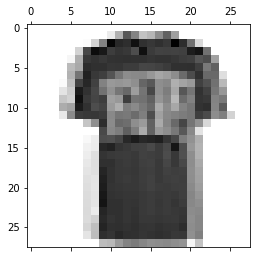

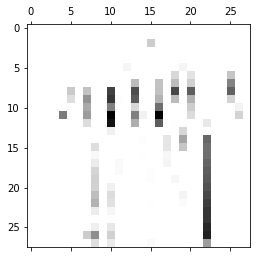

In [183]:

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(model.input, layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap=plt.cm.binary)
second_layer_activation = activations[1]
plt.matshow(second_layer_activation[0, :, :, 4], cmap=plt.cm.binary)

Now we want to output each filter for the convolutional-layers and the max-pool-layer for the specific image

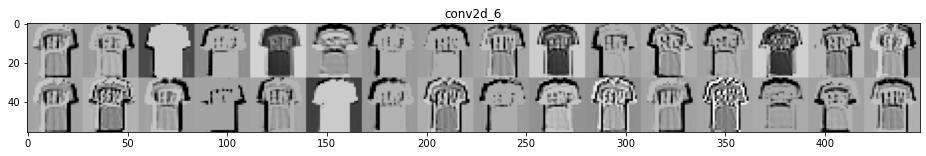

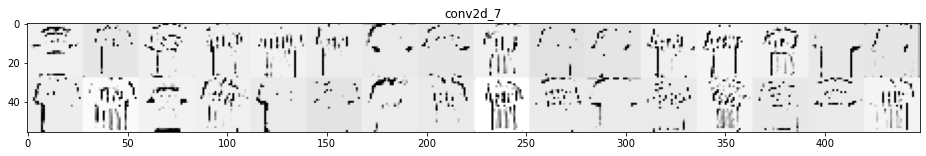

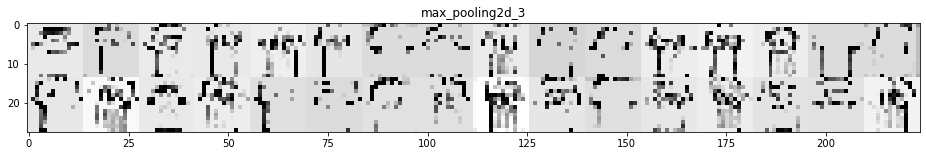

In [184]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv') or layer_name.startswith('max'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap=plt.cm.binary)